In [1]:
!pip install pandas matplotlib seaborn scikit-learn

  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\leoha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# 1. Load the dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df = pd.read_csv(url)

In [ ]:
# 2. Get dataset info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [ ]:
# 3. Remove missing values
df = df.dropna()

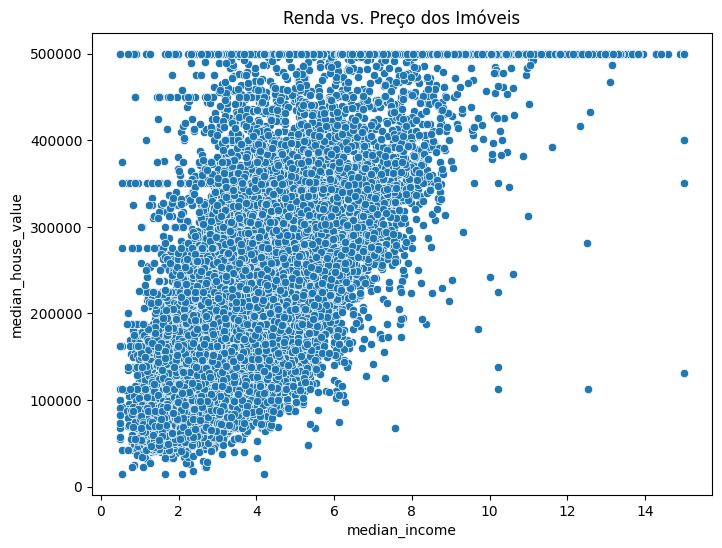

In [ ]:
# 4. Visualize the distribution of house prices
plt.figure(figsize=(8,6))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Renda vs. Preço dos Imóveis')
plt.show()

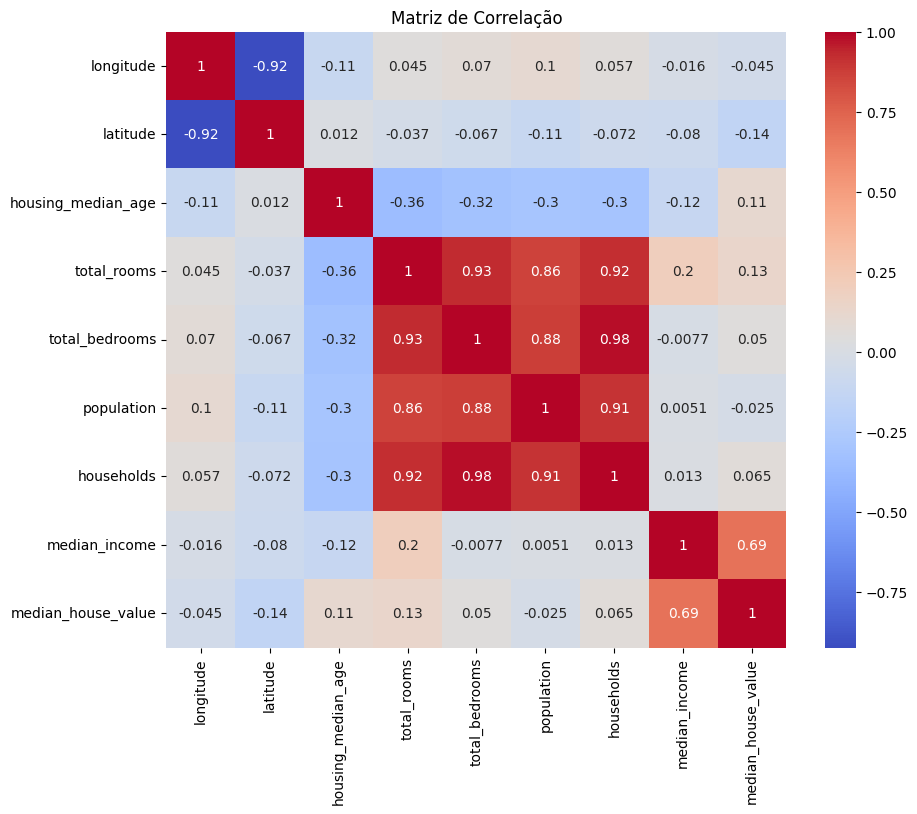

In [ ]:
# 5. Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# 6. Select variables for the model
X = df[['median_income']]  # variável independente
y = df['median_house_value']  # variável dependente

In [ ]:
# 7. Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 8. Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 9. Create and train the linear regression model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')

Erro Quadrático Médio (MSE): 7221011204.24


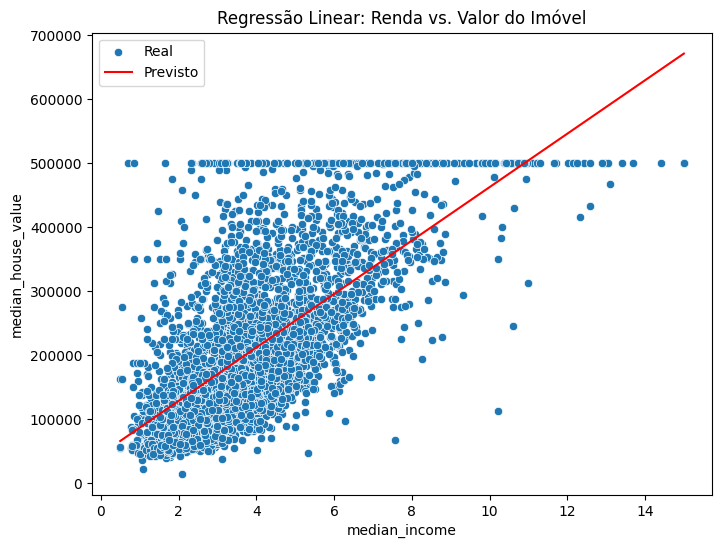

In [ ]:
# 10. View regression results
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, label='Real')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Previsto')
plt.title('Regressão Linear: Renda vs. Valor do Imóvel')
plt.legend()
plt.show()